<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

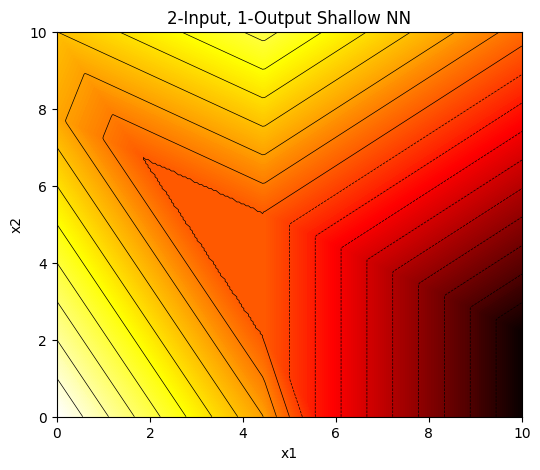

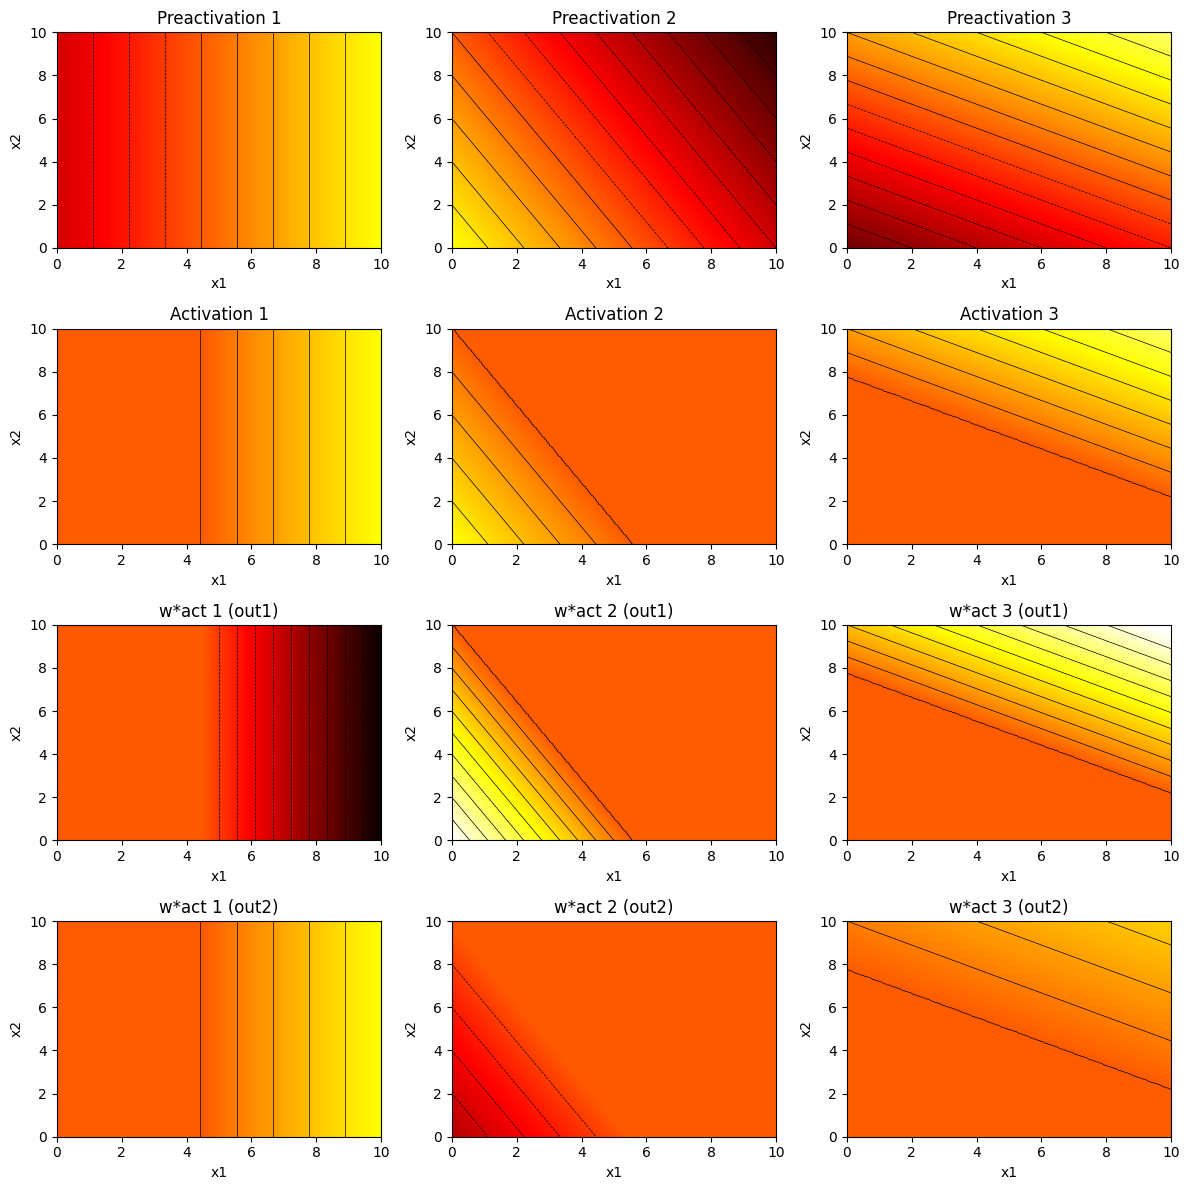

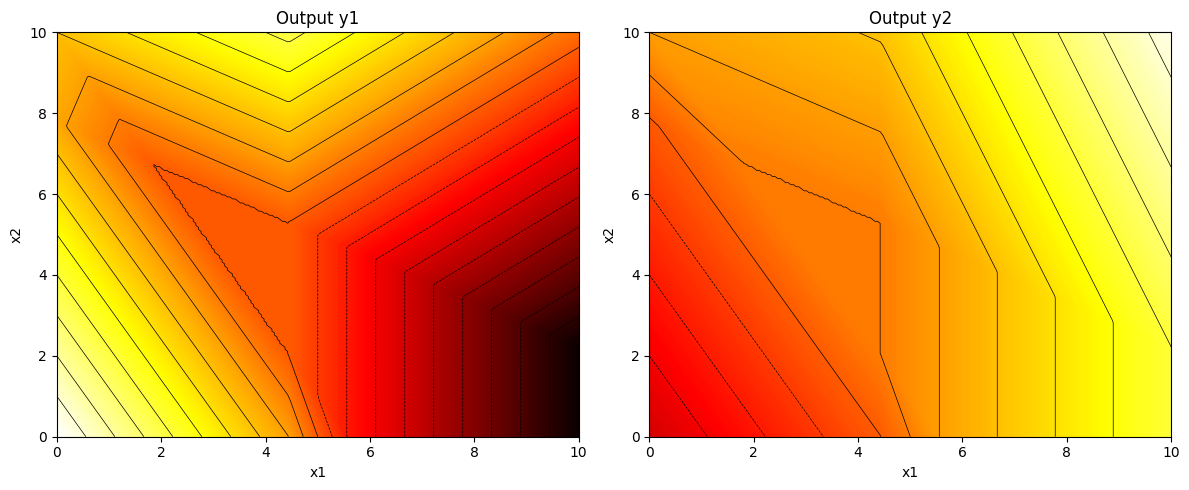

In [1]:

import numpy as np
import matplotlib.pyplot as plt


def draw_2D_function(ax, x1_mesh, x2_mesh, y):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    ax.set_xlabel('x1'); ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels=levels, colors='k', linewidths=0.5)
    return pos


def ReLU(preactivation):
    return preactivation.clip(0.0)


def shallow_2_1_3(x1, x2, activation_fn,
                  phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11, theta_12,
                  theta_20, theta_21, theta_22,
                  theta_30, theta_31, theta_32):

    pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
    pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
    pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2


    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)


    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3


    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


theta_10 = -4.0 ; theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0 ; theta_21 = -0.9; theta_22 = -0.5
theta_30 = -7.0 ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -2.0; phi_2 = 2.0; phi_3 = 1.5


x1 = np.linspace(0, 10, 200)
x2 = np.linspace(0, 10, 200)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)

y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_2_1_3(
    x1_mesh, x2_mesh, ReLU, phi_0, phi_1, phi_2, phi_3,
    theta_10, theta_11, theta_12,
    theta_20, theta_21, theta_22,
    theta_30, theta_31, theta_32)


fig, ax = plt.subplots(figsize=(6,5))
draw_2D_function(ax, x1_mesh, x2_mesh, y)
ax.set_title("2-Input, 1-Output Shallow NN")
plt.show()


def plot_neural_2_inputs_2_outputs(x1,x2, y1, y2,
                                   pre_1, pre_2, pre_3,
                                   act_1, act_2, act_3,
                                   w_act_11, w_act_12, w_act_13,
                                   w_act_21, w_act_22, w_act_23):
    fig, ax = plt.subplots(4,3, figsize=(12,12))
    draw_2D_function(ax[0,0], x1, x2, pre_1); ax[0,0].set_title("Preactivation 1")
    draw_2D_function(ax[0,1], x1, x2, pre_2); ax[0,1].set_title("Preactivation 2")
    draw_2D_function(ax[0,2], x1, x2, pre_3); ax[0,2].set_title("Preactivation 3")
    draw_2D_function(ax[1,0], x1, x2, act_1); ax[1,0].set_title("Activation 1")
    draw_2D_function(ax[1,1], x1, x2, act_2); ax[1,1].set_title("Activation 2")
    draw_2D_function(ax[1,2], x1, x2, act_3); ax[1,2].set_title("Activation 3")
    draw_2D_function(ax[2,0], x1, x2, w_act_11); ax[2,0].set_title("w*act 1 (out1)")
    draw_2D_function(ax[2,1], x1, x2, w_act_12); ax[2,1].set_title("w*act 2 (out1)")
    draw_2D_function(ax[2,2], x1, x2, w_act_13); ax[2,2].set_title("w*act 3 (out1)")
    draw_2D_function(ax[3,0], x1, x2, w_act_21); ax[3,0].set_title("w*act 1 (out2)")
    draw_2D_function(ax[3,1], x1, x2, w_act_22); ax[3,1].set_title("w*act 2 (out2)")
    draw_2D_function(ax[3,2], x1, x2, w_act_23); ax[3,2].set_title("w*act 3 (out2)")
    plt.tight_layout()
    plt.show()


    fig, ax = plt.subplots(1,2, figsize=(12,5))
    draw_2D_function(ax[0], x1, x2, y1); ax[0].set_title("Output y1")
    draw_2D_function(ax[1], x1, x2, y2); ax[1].set_title("Output y2")
    plt.tight_layout()
    plt.show()


def shallow_2_2_3(x1, x2, activation_fn,
                  phi_10, phi_11, phi_12, phi_13,
                  phi_20, phi_21, phi_22, phi_23,
                  theta_10, theta_11, theta_12,
                  theta_20, theta_21, theta_22,
                  theta_30, theta_31, theta_32):

    pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
    pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
    pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2


    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)


    w_act_11 = phi_11 * act_1
    w_act_12 = phi_12 * act_2
    w_act_13 = phi_13 * act_3
    y1 = phi_10 + w_act_11 + w_act_12 + w_act_13


    w_act_21 = phi_21 * act_1
    w_act_22 = phi_22 * act_2
    w_act_23 = phi_23 * act_3
    y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

    return (y1, y2,
            pre_1, pre_2, pre_3,
            act_1, act_2, act_3,
            w_act_11, w_act_12, w_act_13,
            w_act_21, w_act_22, w_act_23)


theta_10 = -4.0 ; theta_11 = 0.9; theta_12 = 0.0
theta_20 =  5.0 ; theta_21 = -0.9; theta_22 = -0.5
theta_30 = -7.0 ; theta_31 = 0.5; theta_32 = 0.9
phi_10 = 0.0; phi_11 = -2.0; phi_12 = 2.0; phi_13 = 1.5
phi_20 = 1.0; phi_21 = 1.0; phi_22 = -1.0; phi_23 = 0.5


x1 = np.linspace(0, 10, 200)
x2 = np.linspace(0, 10, 200)
x1_mesh, x2_mesh = np.meshgrid(x1, x2)


(y1, y2,
 pre_1, pre_2, pre_3,
 act_1, act_2, act_3,
 w_act_11, w_act_12, w_act_13,
 w_act_21, w_act_22, w_act_23) = shallow_2_2_3(
    x1_mesh, x2_mesh, ReLU,
    phi_10, phi_11, phi_12, phi_13,
    phi_20, phi_21, phi_22, phi_23,
    theta_10, theta_11, theta_12,
    theta_20, theta_21, theta_22,
    theta_30, theta_31, theta_32)


plot_neural_2_inputs_2_outputs(x1_mesh, x2_mesh, y1, y2,
                               pre_1, pre_2, pre_3,
                               act_1, act_2, act_3,
                               w_act_11, w_act_12, w_act_13,
                               w_act_21, w_act_22, w_act_23)
